<div style="background-color: #d9ffd4; padding: 20px; border-radius: 10px;">
    <h1 style="color: #2F4F4F; font-family: Calibri, sans-serif; text-align: center;">Jornada 3</h1>
    <p style="color: #2F4F4F; font-family: Calibri, Courier, monospace; text-align: center; font-size: 24px;">
        Solución Numérica de Ecuaciones Diferenciales Ordinarias (EDO) en 2D: Métodos de Runge-Kutta
    </p>
</div>

En la Jornada 2 aplicamos el método de Euler para resolver ecuaciones diferenciales de segundo orden en 2D, abordando:

- El problema del lanzamiento de proyectiles con y sin rozamiento del aire.

- El problema de dos cuerpos simplificado, analizando el sistema Sol-Tierra.

    El método permitió simular la interacción gravitacional. Sin embargo, al analizar la energía mecánica del sistema en función del tiempo, observamos que esta **no se conserva**. Este fenómeno es atribuible a los errores numéricos acumulativos propios del método de Euler.

Para superar estas limitaciones, existen métodos numéricos más sofisticados, como los métodos Runge-Kutta, los cuales proporcionan una mayor precisión al evaluar la pendiente en varios puntos dentro de cada intervalo de tiempo.

<div style="background-color: #FFF9AD; color: black; padding: 10px; border-radius: 5px;">

**Ejemplo:** *Problema de dos cuerpos simplificado*

Se considera el sistema **Sol-Tierra**, donde la Tierra se encuentra inicialmente en 
$\vec{r}_0 = (1.47 \times 10^{11},\, 0)$ m y el Sol está en el origen del sistema de referencia. La velocidad inicial de la Tierra es $\vec{v}_0 = (0,\, 30\,290)$ m/s.

Determine y grafique la trayectoria de la Tierra para $t \in [0,\,700]$ días utilizando el **método de Euler** con paso $h=1$ día.

El movimiento viene dado por la **segunda ley de Newton** y la **ley de gravitación universal**:

$$
\frac{d\vec{v}}{dt} = \left( -\frac{G M x}{r^3},\; -\frac{G M y}{r^3} \right), \qquad
\frac{d\vec{r}}{dt} = \vec{v}
$$

donde:

- $G = 6.672 \times 10^{-11} \;\text{Nm}^2/\text{kg}^2$ (constante de gravitación universal)  
- $M = 1.9891 \times 10^{30}\;\text{kg}$ (masa del Sol)

</div>

Recordemos la solución obtenida mediante el método de Euler estudiada en la Jornada 2:

In [1]:
# como es de costumbre, importamos numpy y matplotlib
import numpy as np
import matplotlib.pyplot as plt

# además importamos las funciones de typing para definir tipos
from typing import Callable, Tuple, Union

def euler_method_second_order_2D(
    f : Callable[[float, np.ndarray, np.ndarray], np.ndarray],
    t0: float,
    r0: Union[Tuple[float, float], np.ndarray],
    v0: Union[Tuple[float, float], np.ndarray],
    tf: float,
    h : float = 1e-5
) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    """
    Resuelve una ecuación diferencial de segundo orden en 2D de la forma:
        v' = f(t, y, v)
        y' = v
    utilizando el método de Euler.

    Args:
        f (Callable): función que define la ecuación diferencial de segundo orden.
                      Debe retornar la aceleración como un np.ndarray (2,).
        t0 (float): tiempo inicial.
        r0 (tuple o np.ndarray): posición inicial (x0, y0).
        v0 (tuple o np.ndarray): velocidad inicial (vx0, vy0).
        tf (float): tiempo final.
        h (float, opcional): tamaño de paso de tiempo. Por defecto: 1e-5.

    Returns:
        Tuple[np.ndarray, np.ndarray, np.ndarray]: vectores de tiempo, posiciones y velocidades.
            - t: np.ndarray de forma (N,)
            - y: np.ndarray de forma (N, 2)
            - v: np.ndarray de forma (N, 2)
    """

    # Convertir r0 y v0 a np.ndarray si son tuplas
    r0 = np.array(r0, dtype=float)
    v0 = np.array(v0, dtype=float)
    
    # número de pasos
    n_steps = int((tf - t0) / h) + 1
    t = np.linspace(t0, tf, n_steps)
    
    # inicializar arrays para posición y velocidad
    r = np.zeros((n_steps, 2))
    v = np.zeros((n_steps, 2))
    
    # condiciones iniciales
    r[0] = r0
    v[0] = v0
    
    # método de Euler
    for i in range(n_steps - 1):
        a = f(t[i], r[i], v[i])  # aceleración
        r[i+1] = r[i] + h * v[i]
        v[i+1] = v[i] + h * a
    
    return t, r, v

Ahora utilizamos la función anterior para resolver nuestra EDO:

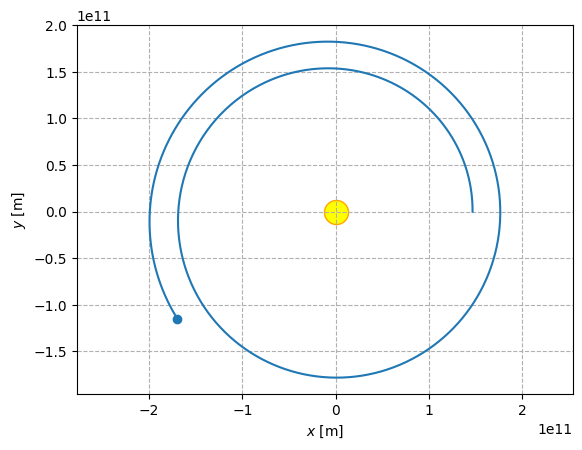

In [2]:
# Problema de 2 cuerpos simplificado
def f_gravitational(t, r, v):
    G = 6.672e-11 # constante de gravitación universal
    M = 1.9891e30 # masa del sol

    r_mag = np.sqrt(r[0]**2 + r[1]**2)

    return -G*M / r_mag**3 * np.array([r[0], r[1]])

# Parámetros del problema
t0 = 0  # s
tf = 2 * 365 * 24 * 3600 # s

h = 1 * 24 * 3600 # s

r0 = (1.47e11, 0) # m
v0 = (0, 30290)   # m/s
 
# resolvemos la ecuación
t, r, v = euler_method_second_order_2D(f=f_gravitational, t0=t0, r0=r0, v0=v0, tf=tf, h=h)

# graficamos
plt.scatter(0, 0, s=300, color="yellow", edgecolors="orange")
plt.scatter(r[-1,0], r[-1, 1])
plt.plot(r[:, 0], r[:, 1])
plt.grid(ls="--")
plt.axis("equal")

plt.xlabel(r"$x$ [m]")
plt.ylabel(r"$y$ [m]")

plt.show()


La Tierra se está alejando mucho del sol en tan solo 2 años!

<div style="background-color: #d4eeff; color: black; padding: 10px; border-radius: 5px;">

### **Mejorar Precisión:** Método RK2.

Consideremos el sistema de ecuaciones diferenciales:

$$\frac{d\vec{v}}{dt} = \vec{f}(t, \vec{r}, \vec{v})$$

$$\frac{d\vec{r}}{dt} = \vec{v}$$

Para resolver este sistema utilizando el método de Runge-Kutta de segundo orden, seguimos los siguientes pasos:

1. **Cálculo de los valores iniciales**:
   
   Calculamos la primera aproximación de la variación de la velocidad y de la posición:

   $$   \vec{k}_1 = h \, \vec{f}(t_n, \vec{r}_n, \vec{v}_n)$$
   
   $$   \vec{m}_1 = h \, \vec{v}_n $$

2. **Cálculo en el punto intermedio**:

   Refinamos las estimaciones utilizando las aproximaciones calculadas previamente:

   $$
   \vec{k}_2 = h \, \vec{f}\left(t_n + \frac{h}{2}, \vec{r}_n + \frac{\vec{m}_1}{2}, \vec{v}_n + \frac{\vec{k}_1}{2}\right)
   $$
   
   $$   \vec{m}_2 = h \, \left( \vec{v}_n + \frac{\vec{k}_1}{2} \right)$$

3. **Actualización final**:

   Con las aproximaciones calculadas, actualizamos la posición y la velocidad al siguiente paso de tiempo:

   $$
   \vec{v}_{n+1} = \vec{v}_n + \vec{k}_2
   $$

   $$
   \vec{r}_{n+1} = \vec{r}_n + \vec{m}_2
   $$

Este algoritmo nos permite aproximar la solución del sistema con una precisión de segundo orden.

</div>

<div style="background-color: #FFF9AD; color: black; padding: 10px; border-radius: 5px;">

**Ejercicio 1:** Cree un *módulo* de Python llamado `ode_solvers` en el cual se implementen métodos numéricos para resolver ecuaciones diferenciales ordinarias (EDO) de segundo orden en 2D. El módulo debe incluir:

1. La función `euler_method_second_order_2D(f, r0, v0, t0, tf, dt)` que implemente el **método de Euler** para sistemas de dos dimensiones.
2. La función `rk2_method_second_order_2D(f, r0, v0, t0, tf, dt)` que implemente el **método de Runge-Kutta de segundo orden** (RK2) para los mismos sistemas.

Luego, utilice este módulo para resolver el problema de dos cuerpos con ambos algoritmos, comparando resultados y analizando la conservación de energía y la trayectoria de los cuerpos.
</div>

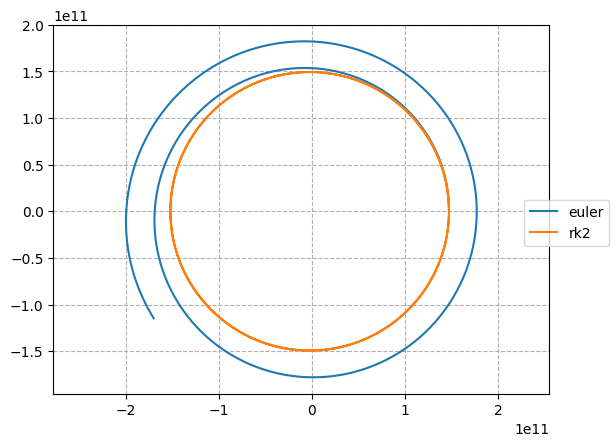

In [ ]:
## código acá



<div style="background-color: #FFF9AD; color: black; padding: 10px; border-radius: 5px;">

**Análisis Energético:** Calcule la energía cinética $K$, la energía potencial gravitatoria $U$ y la energía mecánica $E$ de la tierra para cada instante de tiempo:

$$E = K + U = \frac{1}{2}mv^2 - \frac{GmM}{r}$$

la masa de la tierra es $m=5.972 \times 10^{24}$ kg.

Grafique $K$, $U$ y $E$ y en subplots separados. ¿Se cumple el principio de conservación de la energía?
</div>

In [ ]:
def calculate_energy(r, v):

    ??

    return K, U, E

K_euler, U_euler, E_euler = calculate_energy(r_euler, v_euler)
K_rk2, U_rk2, E_rk2 = calculate_energy(r_rk2, v_rk2)

## graficamos energías

#
#
#

<div style="background-color: #FFF9AD; color: black; padding: 10px; border-radius: 5px;">

**Análisis Energético:** Repita el cálculo de trayectorias pero hasta $t_f=10$ años. Calcule la energía cinética $K$, la energía potencial gravitatoria $U$ y la energía mecánica $E$ de la tierra para cada instante de tiempo:

$$E = K + U = \frac{1}{2}mv^2 - \frac{GmM}{r}$$

la masa de la tierra es $m=5.972 \times 10^{24}$ kg.

Grafique $K$, $U$ y $E$ y en subplots separados.
</div>

In [ ]:
### Repetir el proceso con RK2 para un tiempo de 10 años

#
#
#

<div style="background-color: #d4eeff; color: black; padding: 10px; border-radius: 5px;">

### **Más precisión aún:** Método RK4.

Consideremos el sistema de ecuaciones diferenciales:

$$\frac{d\vec{v}}{dt} = \vec{f}(t, \vec{r}, \vec{v})$$

$$\frac{d\vec{r}}{dt} = \vec{v}$$

Para resolver este sistema utilizando el método de Runge-Kutta de cuarto orden, seguimos los siguientes pasos:

1. **Cálculo de los valores iniciales**:
   
   Calculamos la primera aproximación de la variación de la velocidad y de la posición:

   $$\vec{k}_1 = h \, \vec{f}(t_n, \vec{r}_n, \vec{v}_n)$$
   
   $$\vec{m}_1 = h \, \vec{v}_n$$

2. **Cálculo en el punto intermedio (primer paso)**:

   Calculamos el valor de las pendientes en el punto intermedio del paso de tiempo:

   $$\vec{k}_2 = h \, \vec{f}\left(t_n + \frac{h}{2}, \vec{r}_n + \frac{\vec{m}_1}{2}, \vec{v}_n + \frac{\vec{k}_1}{2}\right)$$
   
   $$\vec{m}_2 = h \, \left( \vec{v}_n + \frac{\vec{k}_1}{2} \right)$$

3. **Cálculo en el punto intermedio (segundo paso)**:

   Refinamos aún más las estimaciones de la pendiente utilizando los valores obtenidos anteriormente:

   $$\vec{k}_3 = h \, \vec{f}\left(t_n + \frac{h}{2}, \vec{r}_n + \frac{\vec{m}_2}{2}, \vec{v}_n + \frac{\vec{k}_2}{2}\right)$$
   
   $$\vec{m}_3 = h \, \left( \vec{v}_n + \frac{\vec{k}_2}{2} \right)$$

4. **Cálculo en el punto final del paso**:

   Calculamos la pendiente al final del intervalo de tiempo \(h\):

   $$\vec{k}_4 = h \, \vec{f}(t_n + h, \vec{r}_n + \vec{m}_3, \vec{v}_n + \vec{k}_3)$$
   
   $$\vec{m}_4 = h \, \left( \vec{v}_n + \vec{k}_3 \right)$$

5. **Actualización final**:

   Con las pendientes calculadas, actualizamos la posición y la velocidad al siguiente paso de tiempo:

   $$\vec{v}_{n+1} = \vec{v}_n + \frac{1}{6} \left( \vec{k}_1 + 2\vec{k}_2 + 2\vec{k}_3 + \vec{k}_4 \right)$$
   
   $$\vec{r}_{n+1} = \vec{r}_n + \frac{1}{6} \left( \vec{m}_1 + 2\vec{m}_2 + 2\vec{m}_3 + \vec{m}_4 \right)$$

Este algoritmo permite obtener una aproximación de cuarto orden para la solución del sistema.

</div>


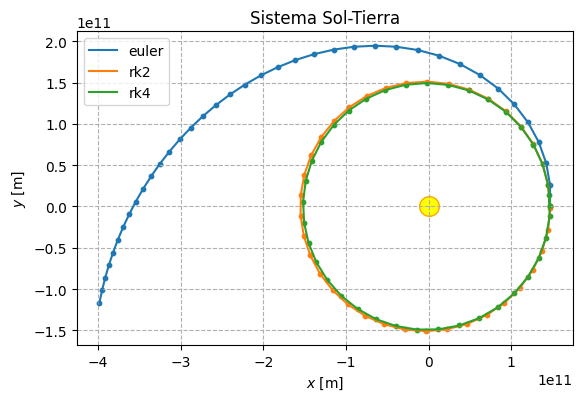

In [ ]:
### código acá



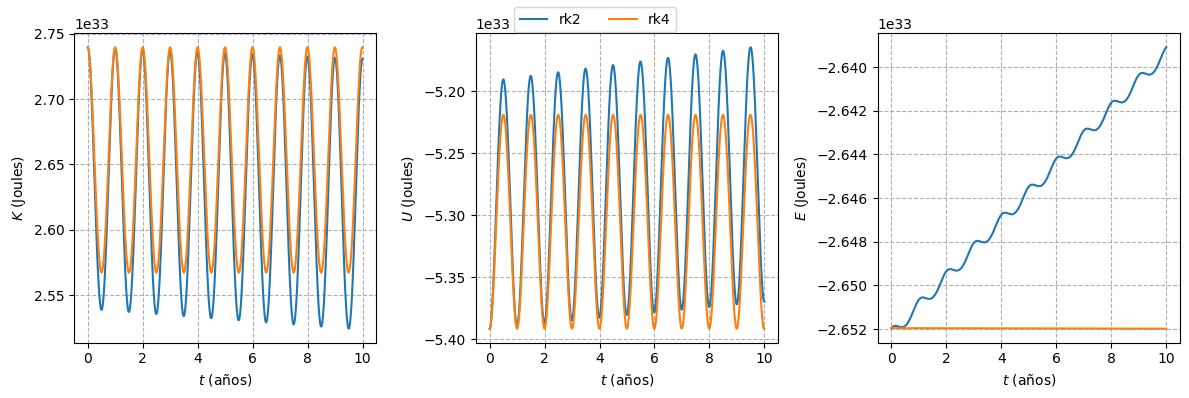

In [ ]:
## gráficos de energía

#
#

### **Aplicación en Electromagnetismo**

<div style="background-color: #FFF9AD; color: black; padding: 10px; border-radius: 5px;">

**Ejercicio: Dinámica de un protón que pasa a través de un campo eléctrico.**

Un protón que se encuentra inicialmente en $\vec{r}_0 = (0 ,0)$ m y tiene una velocidad inicial $\vec{v}_0 = (2.72 \times 10^3, 0)$ m/s, pasa a través de un condensador de placas paralelas separadas una distancia $d=2$ m que están conectadas a una diferencia de potencial alterna $\Delta V(t) = V_0 \sin(\omega t)$ volts. Donde $V_0 = 0.1$ volts y $\omega = 2 \times 10^4$ rad/s.

<p align="center">
  <img src="esquema_campo_electrico.png" width="40%">
</p>

Calcule y grafique la trayectoria del protón entre $t_0=0$ s y $t_f=1 \times 10^{-3}$ s. Utilice el método de Euler con $h=2 \times 10^{-5}$ s, para resolver la ecuación diferencial deducida de la segunda ley de Newton y las leyes de la electrodinámica:



$$ \frac{d\vec{v}}{dt} = \frac{\vec{F}_\text{eléctrica}}{m} =  \frac{q\Delta V (-\hat{y})}{md} = \left (  0, -\frac{q\Delta V}{md} \right) $$

$$ \frac{d\vec{r}}{dt} = \vec{v}$$

Recuerde que la masa del protón es $m=1.67 \times 10^{-27}$ kg y su carga eléctrica es $+q = 1.6 \times 10^{-19}$ C.

Compare su resultado con la solución analítica

$$ \vec{r}(t) = \left(  x_0 + v_{0x} t,\quad y_0 + \left( v_{0y} - \frac{q V_0}{m d \omega} \right) t + \frac{qV_0}{md\omega^2} \sin(\omega t)\right) $$

</div>

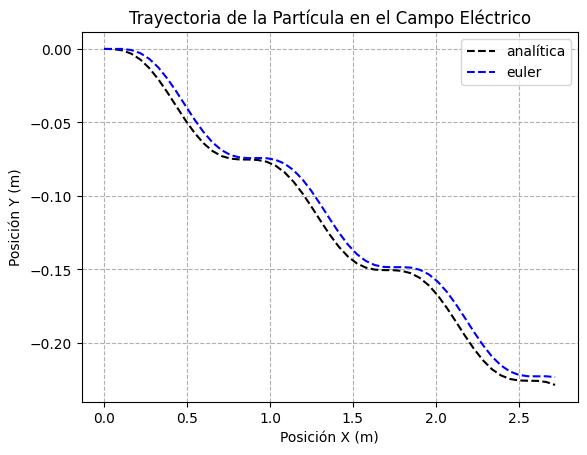

In [ ]:
def f_electrical(t, r, v, d, V0, omega):
    
    ??

    return np.array([??, ??])





<div style="background-color: #FFF9AD; color: black; padding: 10px; border-radius: 5px;">

**Considere que el capacitor no está en toda la región**

Un protón que se encuentra inicialmente en $\vec{r}_0 = (5,0)$ m y tiene una velocidad inicial $\vec{v}_0 = (2.72 \times 10^3, 0)$ m/s, pasa a través de un condensador de placas paralelas separadas una distancia $d=2$ m que están conectadas a una diferencia de potencial alterna $\Delta V(t) = V_0 \sin(\omega t)$ volts. Donde $V_0 = 0.1$ volts y $\omega = 2 \times 10^5$ rad/s.

<p align="center">
  <img src="esquema_campo_electrico.png" width="40%">
</p>

Calcule y grafique la trayectoria del protón entre $t_0=0$ s y $t_f=1 \times 10^{-3}$ s. Utilice el método de Euler con $h=2 \times 10^{-5}$ s, para resolver la ecuación diferencial deducida de la segunda ley de Newton y las leyes de la electrodinámica:



$$ \frac{d\vec{v}}{dt} = \frac{\vec{F}_\text{eléctrica}}{m} = \vec{f} (t, \vec{r}, \vec{v})$$

$$ \frac{d\vec{r}}{dt} = \vec{v}$$

talque:

$$\vec{f} (t, \vec{r}, \vec{v}) = \left (0, - \frac{q\Delta V}{md} \right); completar$$

Recuerde que la masa del protón es $m=1.67 \times 10^{-27}$ kg y su carga eléctrica es $+q = 1.6 \times 10^{-19}$ C.

Compare su resultado con la solución analítica

$$ \vec{r}(t) = \left(  x_0 + v_{0x} t  , y_0 + \left( v_{0y} + \frac{q V_0}{m d \omega} \right) t - \frac{qV_0}{md\omega^2} \sin(\omega t)\right) $$

</div>

In [ ]:
def f_electrical(t, r, v, x0, y0, L, d, V0, omega):
    
    ??

    return np.array([??, ??])

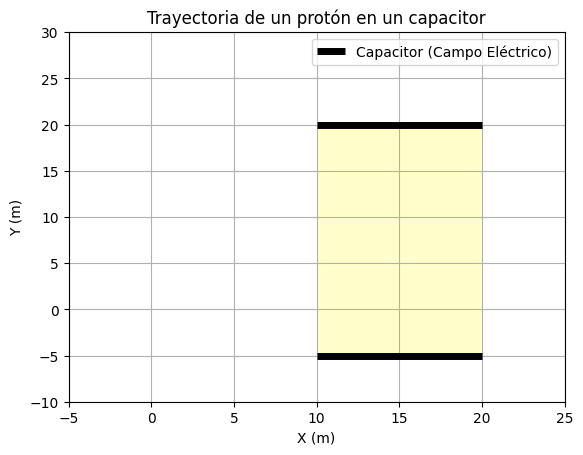

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Definición de la función eléctrica
def f_electrical(t, r, v):
    m = 1.6726e-27  # masa del protón en kg
    q = 1.6e-19     # carga del protón en C
    E0 = 1e-6       # Amplitud del campo eléctrico en V/m
    omega = 7       # Frecuencia angular en rad/s

    # Extraemos la posición x
    x = r[0]

    # Calculamos la fuerza eléctrica en función de la posición
    if 10 <= x <= 20:
        # Campo eléctrico solo actúa entre x=10 y x=20
        E = E0 * np.sin(omega * t)  # Campo eléctrico en y
    else:
        E = 0  # Fuera del rango del capacitor

    # Devuelve el vector de fuerzas: [F_x, F_y]
    return np.array([0, q * E / m])  # F_x es 0, F_y es q*E

# Método RK4 para resolver el sistema
def rk4_method_second_order(f, t0, r0, v0, tf, h=0.001):
    t = np.arange(start=t0, step=h, stop=tf + h)
    r = np.zeros(shape=(len(t), 2))
    v = np.zeros_like(r)

    r[0] = r0
    v[0] = v0

    for n in range(len(t) - 1):
        k1 = h * f(t[n], r[n], v[n])
        m1 = h * v[n]

        k2 = h * f(t[n] + h/2, r[n] + m1/2, v[n] + k1/2)
        m2 = h * (v[n] + k1/2)

        v[n+1] = v[n] + k2
        r[n+1] = r[n] + m2

    return t, r, v

# Condiciones iniciales
r0 = (0.0, 10.0)  # Posición inicial (0, 10)
v0 = (3.0, 2.0)   # Velocidad inicial (3, 2)
t0 = 0.0          # Tiempo inicial
tf = 8.0          # Tiempo final
h = 0.1           # Paso de tiempo

# Resolución del sistema
t, r, v = rk4_method_second_order(f=f_electrical, t0=t0, r0=r0, v0=v0, tf=tf, h=h)

# Configuración de la figura
fig, ax = plt.subplots()
line, = ax.plot([], [], 'b--')
point, = ax.plot([], [], 'ro')
ax.set_xlim(-5, 25)
ax.set_ylim(-10, 30)
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_title('Trayectoria de un protón en un capacitor')
ax.grid()

# Añadiendo líneas horizontales para simular el capacitor
ax.hlines(y=-5, xmin=10, xmax=20, color='k', linewidth=5, linestyle='-', label='Capacitor (Campo Eléctrico)')
ax.hlines(y=20, xmin=10, xmax=20, color='k', linewidth=5, linestyle='-')

ax.axvspan(ymin=0.12, ymax=0.75, xmin=10, xmax=20, facecolor='yellow', alpha=0.2)


# Añadir leyenda
ax.legend()

# Inicialización de la animación
def init():
    line.set_data([], [])
    point.set_data([], [])
    return line, point

# Función de actualización para la animación
def update(frame):
    line.set_data(r[:frame, 0], r[:frame, 1])  # Trayectoria
    point.set_data(r[frame, 0], r[frame, 1])    # Posición actual
    return line, point

# Creación de la animación
ani = FuncAnimation(fig, update, frames=len(t), init_func=init, blit=True, interval=20)

plt.show()


In [12]:
from IPython.display import HTML
HTML(ani.to_jshtml())

<div style="background-color: #d9ffd4; color: black; padding: 10px; border-radius: 5px;">

**Conclusión:**  

- Los algoritmos de **Runge-Kutta** mejoran la precisión en la resolución numérica de ecuaciones diferenciales ordinarias.  
- Implementamos y comparamos estos métodos para ecuaciones de segundo orden en 2D, aplicándolos al **problema simplificado de dos cuerpos** y aun problema de **electrodinámica**.  
- Observamos que **RK4** permite órbitas cerradas incluso con pasos grandes, y la conservación de energía sirve como criterio de precisión.  
- En este problema simplificado, se asume que uno de los cuerpos tiene una masa tan grande que permanece en reposo en el origen, mientras que el cuerpo más pequeño orbita alrededor de él, reduciendo así el sistema a resolver las ecuaciones de movimiento solo para el cuerpo de menor masa.  
- Para estudiar un enfoque más realista, donde ambos cuerpos se mueven debido a la atracción gravitacional mutua, será necesario resolver un **sistema de ecuaciones diferenciales acopladas**. Para el caso general de N cuerpos, se requerirán N ecuaciones acopladas.  

**Próxima Jornada:** Estudio del **algoritmo de Verlet**, implementación con clases en Python y simulaciones de sistemas de N cuerpos. El algoritmo de Verlet es un excelente candidato para abordar el problema de N cuerpos, ya que tiene un bajo costo computacional y es especialmente eficiente en problemas conservativos como este, manteniendo mejor la energía a lo largo del tiempo.

</div>


<div style="padding: 15px; border-top: 2px solid #2F4F4F; margin-top: 30px; background-color: var(--custom-bg-color); color: var(--custom-text-color);">
    <p style="font-family: Calibri, sans-serif; text-align: left; font-size: 16px;">
        Omar Fernández <br>
        Profesor de Física Computacional IV para Astrofísica <br>
        Ingeniero Físico <br>
        <a href="mailto:omar.fernandez.o@usach.cl" class="email-link">omar.fernandez.o@usach.cl</a> <br>
    </p>
</div>

<style>
:root {
    --custom-bg-color: #F8F8F8;
    --custom-text-color: #2F4F4F;
    --custom-link-color: blue;
}

@media (prefers-color-scheme: dark) {
    :root {
        --custom-bg-color: #444444;
        --custom-text-color: #F8F8F8;
        --custom-link-color: magenta;
    }
}

.email-link {
    color: var(--custom-link-color);
}
</style>